In [527]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

# Reading the data

In [ ]:
#df = pd.read_csv('/kaggle/input/googleplaystore/googleplaystore.csv');

In [528]:
df = pd.read_csv('C:/Users/nithyaa/Documents/Kaggle/googleplaystore.csv');

Here's a quick overview of the dataset:

Number of rows: 10,841

Number of columns: 13

Column names:

App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [530]:
df.shape

(10841, 13)

In [531]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [532]:
outliers = df.describe().loc[['min', 'max']].T
print(outliers)

        min   max
Rating  1.0  19.0


Sample Data (first 5 rows):

In [533]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Data Cleaning**

1. Convert columns to proper data types, especially: Reviews, Installs, Price to numeric types.

In [534]:
# 1. Clean 'Reviews': convert to numeric from string
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [535]:
# 2. Clean 'Installs': remove ',' and '+' then convert to numeric
df['Installs'] = df['Installs'].str.replace('[+,]','',regex=True)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

In [536]:
# 3. Clean 'Price': remove '$' then convert to float
df['Price'] = df['Price'].str.replace('$','',regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [537]:
# 4. Clean 'Last Updated' to Datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'],errors='coerce')

In [538]:
# 5. Clean 'Size': 
    # a.Remove M and k
df['Size'] = df['Size'].str.replace('[Mk]','',regex=True)
    # b. Replace 'Varies with Device' to NaN
df['Size'] = df['Size'].replace('Varies with Device',np.nan)


In [539]:
    # c. Change the datatype to float
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


2. Check for **missing values**

In [541]:
missing_counts = df.isnull().sum();
print(missing_counts)

App                  0
Category             0
Rating            1474
Reviews              1
Size              1696
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64


Remove the rows that has missing values in the fields: rating, installs, category, reviews,type and price

In [542]:
df = df.dropna(subset=['Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price'])

 Drop rows with missing or malformed 'App' names


In [543]:
df = df[df['App'].notna()]

In [544]:
# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

In [545]:
print(df.isnull().sum());

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          2
dtype: int64


# Removing columns that are almost empty

In [546]:
threshold = len(df) * 0.2
threshold

1873.2

In [547]:
df.dropna(thresh=threshold, axis = 1,inplace=True)

In [548]:
# Rows: 9,366 (from original 10,841 — removed problematic or incomplete entries)

print(df.shape)

(9366, 13)


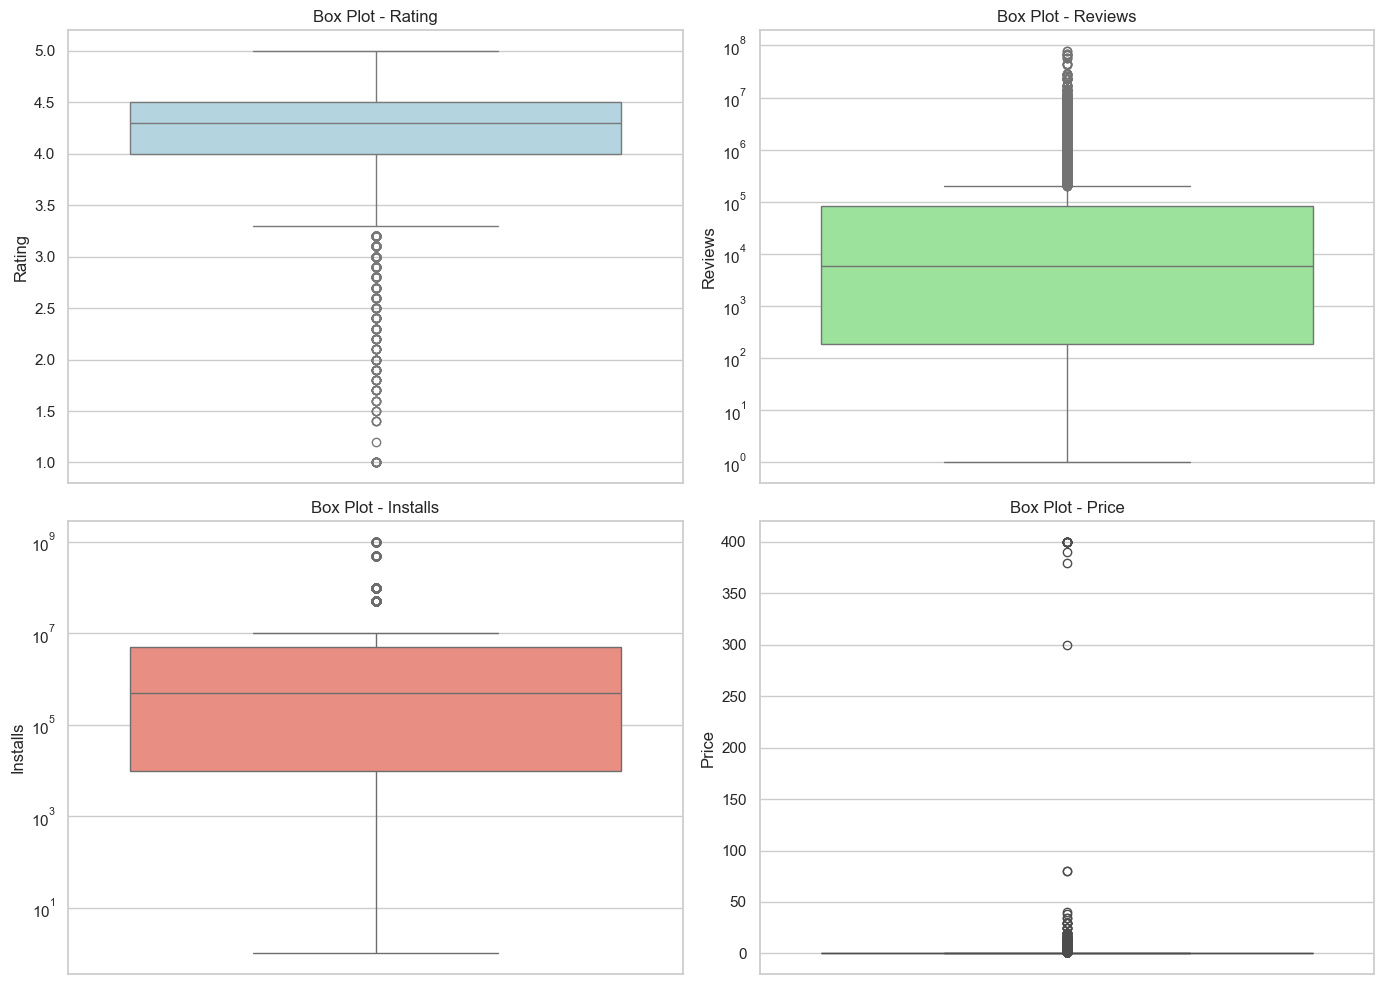

In [549]:
# Set plot style
sns.set(style="whitegrid")

# Plot box plots for each feature
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Rating
sns.boxplot(y=df['Rating'], ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Box Plot - Rating')

# Reviews
sns.boxplot(y=df['Reviews'], ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Box Plot - Reviews')
axs[0, 1].set_yscale('log')  # Log scale due to large range

# Installs
sns.boxplot(y=df['Installs'], ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Box Plot - Installs')
axs[1, 0].set_yscale('log')

# Price
sns.boxplot(y=df['Price'], ax=axs[1, 1], color='aqua')
axs[1, 1].set_title('Box Plot - Price')
#axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

Filling the Type, Current Ver and Android Ver with the most frequently occuring value of the field.

In [550]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [551]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace = True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace = True)

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\3260476127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(str(df['Type'].mode().values[0]),inplace = True)
C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\3260476127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [552]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [553]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178.0,19.0,50000.0,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,1000000.0,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,1000000.0,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


In [554]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,9366.000000,9.366000e+03,7729.000000,9.366000e+03,9366.000000,9366
mean,4.191757,5.140498e+05,37.284513,1.789744e+07,0.960928,2017-11-29 09:44:32.901986048
min,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.862500e+02,6.100000,1.000000e+04,0.000000,2017-10-09 00:00:00
50%,4.300000,5.930500e+03,16.000000,5.000000e+05,0.000000,2018-06-01 00:00:00
75%,4.500000,8.153275e+04,37.000000,5.000000e+06,0.000000,2018-07-24 00:00:00
max,5.000000,7.815831e+07,994.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.515219,3.144042e+06,93.509493,9.123822e+07,15.816585,NaN


# **EDA**

In [555]:
grp = df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\345646883.py:2: FutureWarning: The provided callable <function mean at 0x00000262ADFFF4C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  x = grp['Installs'].agg(np.mean)
C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\345646883.py:3: FutureWarning: The provided callable <function sum at 0x00000262ADFFE3E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  y = grp['Price'].agg(np.sum)
C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\345646883.py:4: FutureWarning: The provided callable <function mean at 0x00000262ADFFF4C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" i

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\3331388548.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x,'b--',color = 'b')


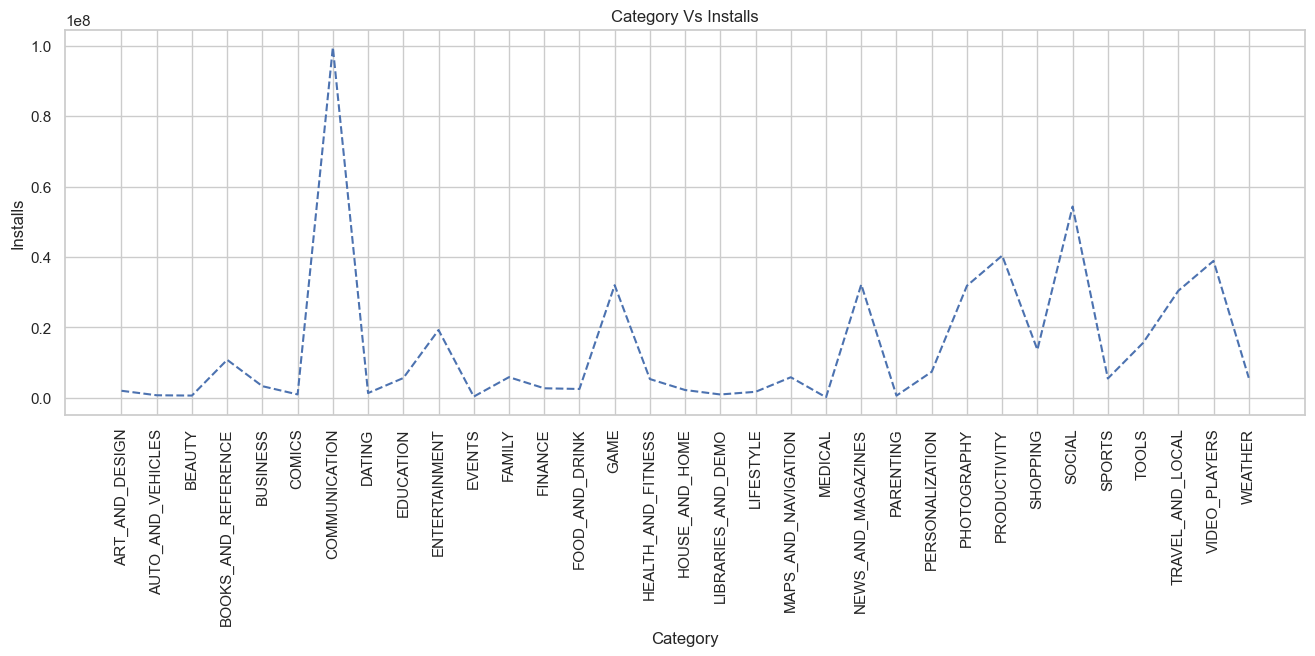

In [556]:
plt.figure(figsize = (16,5))
plt.plot(x,'b--',color = 'b')
plt.xticks(rotation = 90)
plt.title('Category Vs Installs')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\1033139552.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y,'r--',color = 'r')


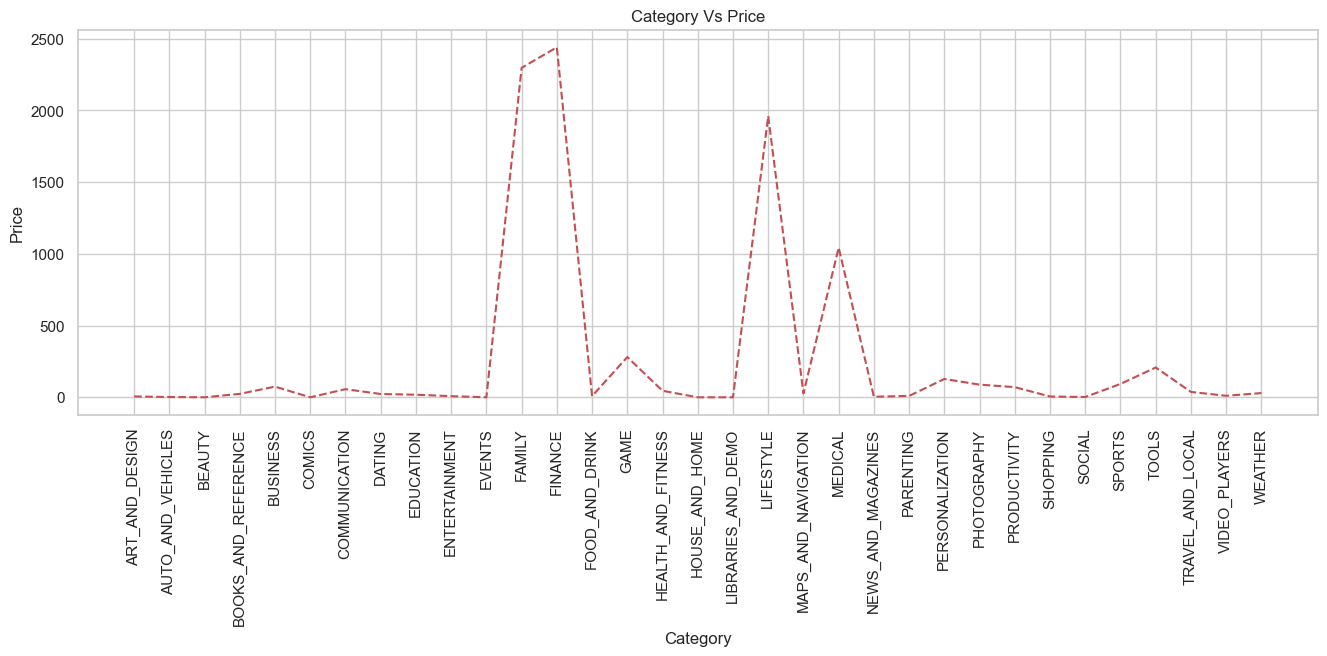

In [557]:
plt.figure(figsize = (16,5))
plt.plot(y,'r--',color = 'r')
plt.xticks(rotation = 90)
plt.title('Category Vs Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\2377473682.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(z,'g--',color='g');


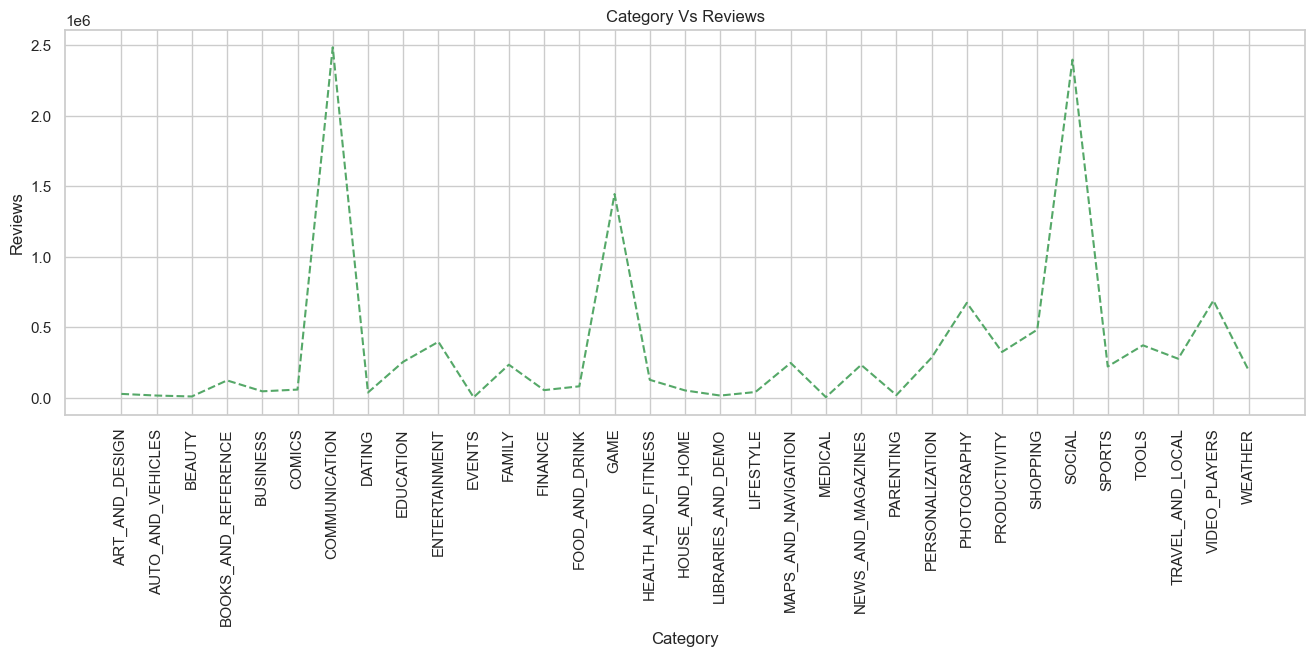

In [558]:
plt.figure(figsize =(16,5))
plt.plot(z,'g--',color='g');
plt.xticks(rotation =90)
plt.title('Category Vs Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show();

**KDE plots**

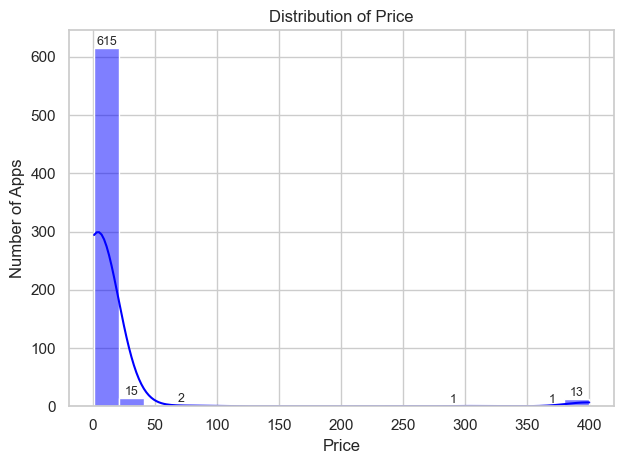

In [559]:
# Distribution of Price
g = sns.histplot(data=paid_apps,x='Price',kde=True,color='blue',bins=20)

# Add bar labels
for bar in g.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()


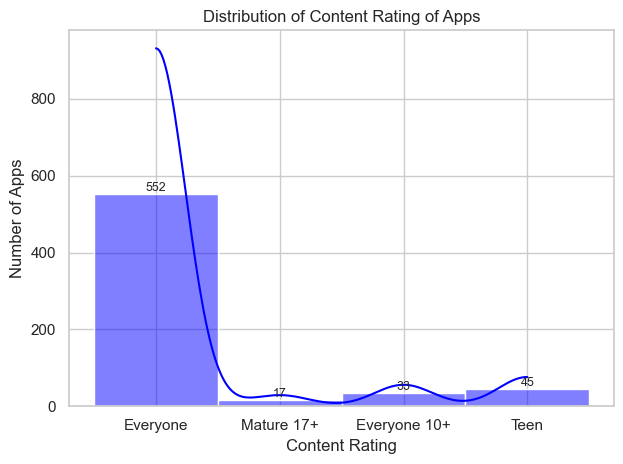

In [560]:
# Distribution of Content Rating

g = sns.histplot(data=paid_apps,x='Content Rating',kde=True,color='blue',bins=30)

# Add bar labels
for bar in g.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

plt.title('Distribution of Content Rating of Apps')
plt.xlabel('Content Rating') 
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()



# **Findings**

1. How many apps are there in total?



In [561]:
app_count = df.shape[0]
print(f"Total number of apps in the store are: {app_count}")

Total number of apps in the store are: 9366


2. What are the unique app categories?

In [562]:
unique_app_category = df['Category'].unique()
category_count = unique_app_category.size
print(f"There are {category_count} categories in total.")
print(f"Different Categories of App are: {unique_app_category}")

There are 33 categories in total.
Different Categories of App are: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


**Most popular Categories of all apps**

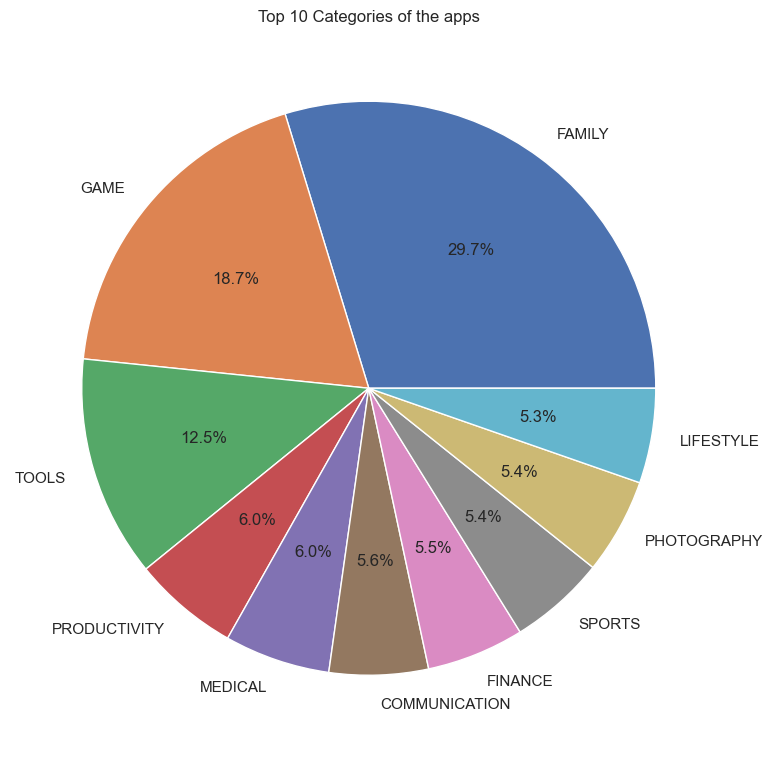

In [563]:
cat_count=df['Category'].value_counts().head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cat_count,labels=cat_count.index,autopct='%1.1f%%', startangle=0)

plt.title('Top 10 Categories of the apps')
plt.tight_layout()
plt.show()


3. Which category has the most apps?

In [564]:
most_common_category = df['Category'].value_counts().idxmax()
count = df['Category'].value_counts().max()

print(f"The most common category is '{most_common_category}' with {count} occurrences.")

The most common category is 'FAMILY' with 1747 occurrences.


4. What is the average app rating overall in each category?


In [565]:
average_rating_category = df.groupby('Category')['Rating'].mean()

print(f"Average app Rating over different Categories:\n {average_rating_category} ")

Average app Rating over different Categories:
 Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS           

In [566]:
average_rating = df['Rating'].mean()

print(f"Average app Rating:\n {average_rating} ")

Average app Rating:
 4.191757420456972 


5. How many apps are free vs paid?

In [567]:
free_app_counts = len(df[df['Type'] == 'Free'])
print(f"No of Free apps: {free_app_counts}")

No of Free apps: 8719


In [568]:
paid_app_counts = len(df[df['Type'] == 'Paid'])
print(f"No of Paid apps: {paid_app_counts}")

No of Paid apps: 647


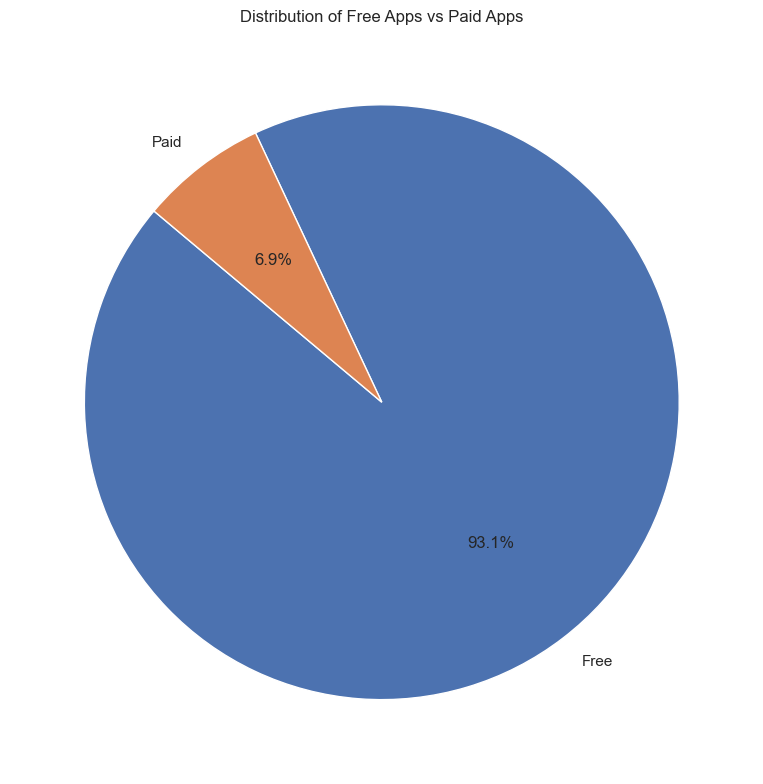

In [569]:
counts = df['Type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=140)

plt.title('Distribution of Free Apps vs Paid Apps')
plt.tight_layout()
plt.show()

6. What’s the average price of paid apps?

In [570]:
# Compute average price of paid apps

paid_apps = df[df['Price'] > 0]

paid_mean = paid_apps['Price'].mean()
print(f"Average price of paid apps: {paid_mean}")

Average price of paid apps: 13.910432766615148


In [ ]:
# Compute the maximum price of paid apps
paid_max = paid_apps['Price'].max()
print(f"App with highest price is: {paid_max}")

# Compute the minimum price of paid apps
paid_min = paid_apps['Price'].min()
print(f"App with highest price is: {paid_min}")

7. What is the distribution of app ratings?

In [ ]:
df['Rating'].describe()

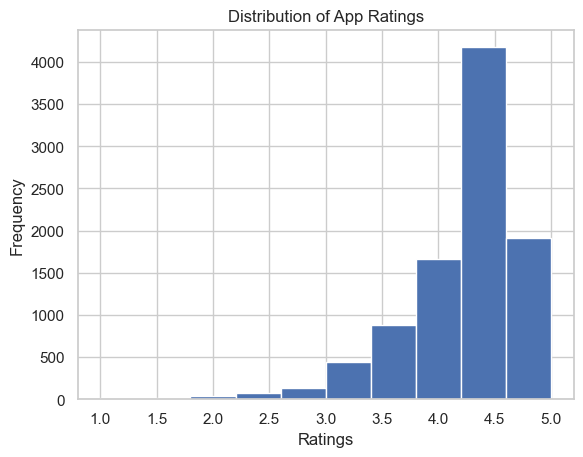

In [514]:
#Plotting a histogram to show the Ratings Distribution
df['Rating'].hist(bins=10)
plt.title("Distribution of App Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

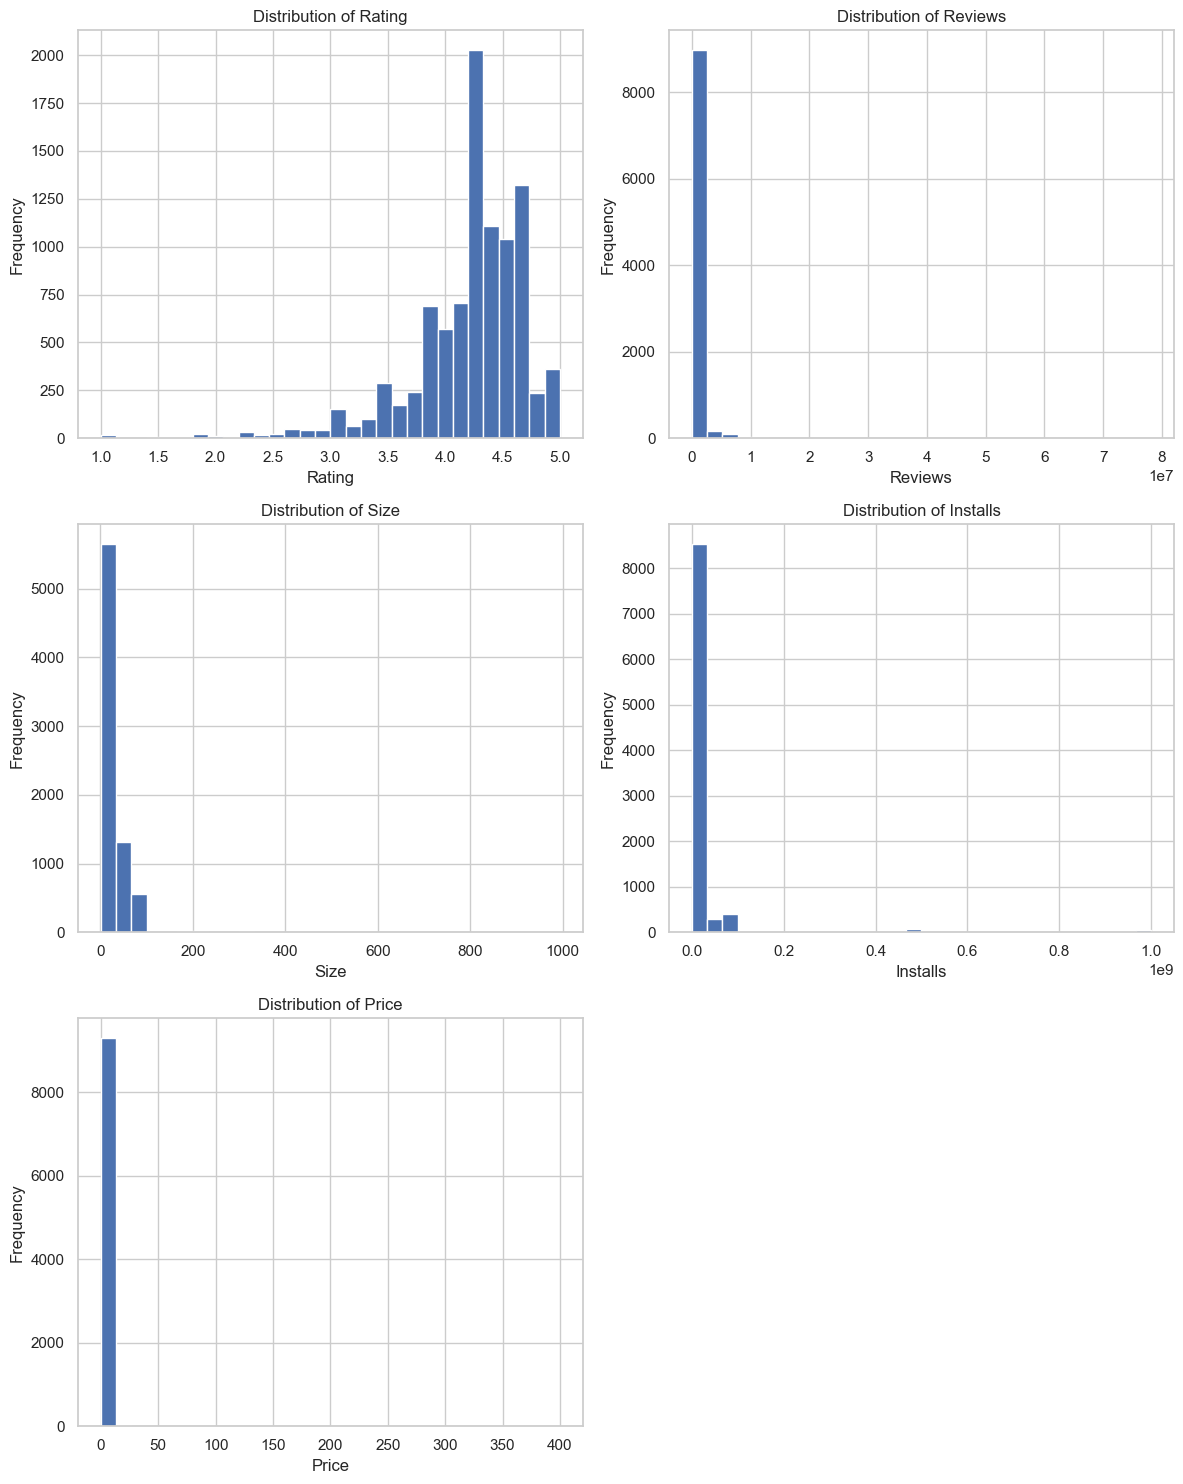

In [519]:
import math

# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots (2 plots per row)
n_cols = 2
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Set up subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Flatten axes for easy iteration (handles cases where n_rows or n_cols is 1)
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    df[column].hist(bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

8. Which apps have the highest number of reviews?

In [521]:
max_review = df.loc[df['Reviews'].idxmax()]
max_review_app = max_review['App']

print(f"The app having highest number of reviews is: {max_review_app} with {max_review['Reviews']} counts")

The app having highest number of reviews is: Facebook with 78158306.0 counts


9. What is the average number of installs?

In [ ]:
avg_installs = df['Installs'].mean()
print(f"Average number of installs: {avg_installs}")

In [ ]:
# Group by Category and calculate the average number of installs per category
avg_installs_by_category = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
avg_installs_by_category.head(5)

# **Data Analysis**

In [ ]:
# Sort and get top 10 most expensive apps
top_10_expensive = paid_apps.sort_values(by='Price', ascending=False).head(10)

# Display selected columns
print("Top 10 Expensive Apps in the Playstore\n")
print(top_10_expensive[['App', 'Category', 'Price', 'Rating', 'Installs']])
output = top_10_expensive[['App', 'Category', 'Price', 'Rating', 'Installs']]
print(output.to_excel("Top_10_Expensive_Apps.xlsx", index=False))

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\932094431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(popular_apps,x='Installs',y='App',palette='deep')


<Axes: xlabel='Installs', ylabel='App'>

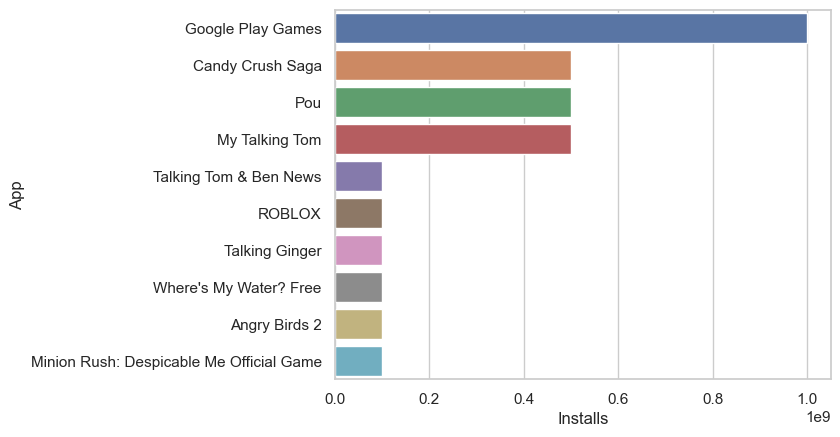

In [507]:
#Drilling Down on Family Category

popular_apps = df[df['Category']=='FAMILY'].sort_values(by='Installs',ascending=False).head(10)

sns.barplot(popular_apps,x='Installs',y='App',palette='deep')

**Top 10 Paid Apps in the Family Category**

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\738115188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10_paid_FAMILY,x='Installs',y='App',palette='deep')


<Axes: xlabel='Installs', ylabel='App'>

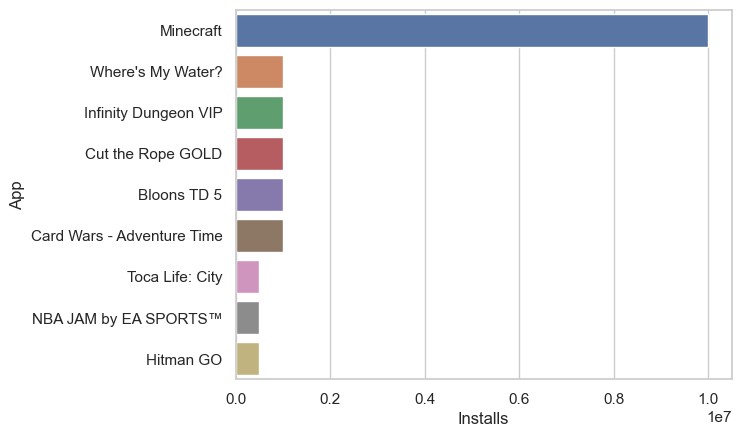

In [508]:
top_10_paid_FAMILY =df[(df['Category']=='FAMILY') & (df['Type']=='Paid')].sort_values(by='Installs',ascending=False).head(10)

sns.barplot(top_10_paid_FAMILY,x='Installs',y='App',palette='deep')

We will answer a few questions here.
1. Which app categories have the highest average rating?

In [509]:
# Sort and get top 5 apps with highest avg rating
top_5_category = average_rating_category.sort_values(ascending=False).head(5)

print(f"The top 5 app categories that has highest average rating are:\n {top_5_category}")

The top 5 app categories that has highest average rating are:
 Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
Name: Rating, dtype: float64


2. Which categories have the most installs on average?

In [510]:
# Sort and get the top 5 most installs on the average
top_5_category_installs = round(df.groupby('Category')['Installs'].mean(),2).sort_values(ascending=False).head(5)

print(f"The top 5 app categories that has highest number of installs are:\n {top_5_category_installs} ")

The top 5 app categories that has highest number of installs are:
 Category
COMMUNICATION         99534272.96
SOCIAL                54323712.26
PRODUCTIVITY          40387664.33
VIDEO_PLAYERS         38886857.50
NEWS_AND_MAGAZINES    32172577.90
Name: Installs, dtype: float64 


**Interpretation**

COMMUNICATION has the highest number of installs with 99M, which includes apps like Whatsapp, Facebook Messenger, UC Browser, etc
Next follows SOCIAL with 54M installs having apps like Facebook, Instagram, Snapchat, etc

3. Is there a correlation between rating and number of installs?

In [ ]:
correlation = df['Rating'].corr(df['Installs'])

print(f"Correlation between Rating and Installs : {correlation}")

**Interpretation**

Very weak correlation between Rating and Installs. Which shows that apps with most installs don't necessarily have better ratings. To have a strong correlation, the correlation value should be closer to 1.

We can instead check the correlation between type(free or paid) and Installs. As we are performing correlation calculation between a categorical feature and a numerical feature, we cannot use .corr() function. We can perform the ANOVA statistical test to check the difference in means across groups. This can be done as below:

In [522]:
from scipy.stats import f_oneway

# Split data into Free and Paid groups
free_installs = df[df['Type'] == 'Free']['Installs']
paid_installs = df[df['Type'] == 'Paid']['Installs']

# Perform one-way ANOVA
anova_result = f_oneway(free_installs, paid_installs)

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}")
print(f"ANOVA p-value: {anova_result.pvalue:.8f}")


ANOVA F-statistic: 26.48
ANOVA p-value: 0.00000027


As p-value < 0.05, there is a statistically significant difference between installs of Free and Paid apps. Free apps have WAY more installs.
Let's visualize this in a box plot.

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\1882937484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='Installs', data=df,palette='pastel')


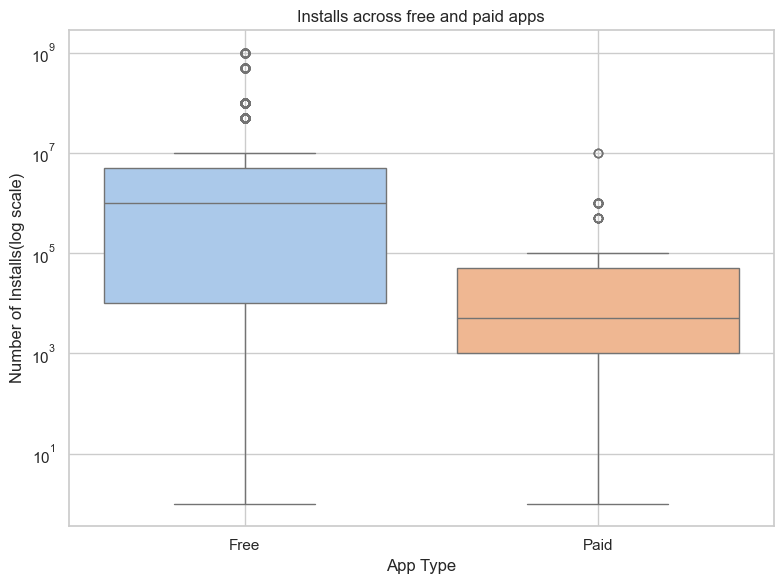

In [524]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Installs', data=df,palette='pastel')
plt.yscale('log')

# Add title and labels
plt.title('Installs across free and paid apps')
plt.xlabel('App Type')
plt.ylabel('Number of Installs(log scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Do paid apps generally have better ratings than free apps?

In [525]:
free_apps = df[df['Type']=='Free']

free_apps_mean_rating = round(free_apps['Rating'].mean(),3)
paid_apps_mean_rating = round(paid_apps['Rating'].mean(),3)
mean_rating = round(df['Rating'].mean(),3)

print(f"Average rating of free apps: {free_apps_mean_rating}")
print(f"Average rating of paid apps: {paid_apps_mean_rating}")
print(f"Average rating of apps: {mean_rating}")


Average rating of free apps: 4.186
Average rating of paid apps: 4.267
Average rating of apps: 4.192


**Interpretation**

This shows that the free apps, with average rating of 4.186 are rated lower than paid apps with 4.267 average rating.
The paid apps are rated higher than the average score of all apps.

5. Which genres are most common in highly-rated apps (rating > 4.5)?

In [600]:
high_rated_apps = df[df['Rating']> 4.5]
print(f"Number of apps rated above 4.5 is: {high_rated_apps.shape[0]}")

Number of apps rated above 4.5 is: 1917


In [ ]:
top_genres = high_rated_apps['Genres'].value_counts().head(10)

print(f"Top 10 Genres that have highly-rated apps with counts are: \n{top_genres}")

Top 10 Genres that have highly-rated apps with counts are: 
Genres
Education           174
Tools               114
Health & Fitness    106
Medical             101
Entertainment        87
Personalization      84
Lifestyle            84
Finance              74
Productivity         73
Business             66
Name: count, dtype: int64


In [ ]:
#Highly rated apps with high installs inside the Education Genre

high_rated_apps_education = df[(df['Genres'] == 'Education') & (df['Rating'] > 4.5) & (df['Installs'] > 1000000)].sort_values(by='Rating',ascending = False).head(10)

print(f"Highly rated apps with high installs inside the Education Genre are:\n")
print(high_rated_apps_education[['App','Rating','Type','Installs','Content Rating']])

In [595]:
high_rated_apps_education

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
652,Learn English with Wlingua,EDUCATION,4.7,314299.0,3.3,10000000.0,Free,0.0,Everyone,Education,2018-05-02,1.94.9,4.0 and up
685,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107903.0,NaN,10000000.0,Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device
684,English with Lingualeo,EDUCATION,4.7,254519.0,27.0,5000000.0,Free,0.0,Everyone,Education,2018-07-20,2.8.1,4.1 and up
755,Learn English with Wlingua,EDUCATION,4.7,314300.0,3.3,10000000.0,Free,0.0,Everyone,Education,2018-05-02,1.94.9,4.0 and up
741,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107884.0,NaN,10000000.0,Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device
754,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107903.0,NaN,10000000.0,Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device
746,Free english course,EDUCATION,4.7,142632.0,6.9,5000000.0,Free,0.0,Everyone,Education,2018-07-12,2.8,4.1 and up
780,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107948.0,NaN,10000000.0,Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device
5027,Ayat - Al Quran,FAMILY,4.7,173394.0,8.5,5000000.0,Free,0.0,Everyone,Education,2018-03-13,2.9.1,4.0 and up
649,TED,EDUCATION,4.6,181893.0,18.0,10000000.0,Free,0.0,Everyone 10+,Education,2018-07-27,3.2.5,4.1 and up


In [597]:
top_genre_df = top_genres.reset_index()
top_genre_df.columns=['Genres','Count']

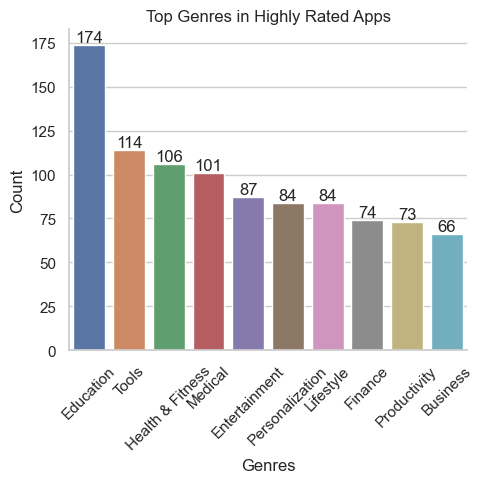

In [598]:
# Create the catplot
g = sns.catplot(x='Genres',y='Count',data=top_genre_df, kind='bar',palette='deep',hue='Genres',legend=False)

# Add count labels to bars
ax = g.ax
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=45)
plt.title('Top Genres in Highly Rated Apps')
plt.tight_layout()
plt.show()


6. Which content ratings (e.g. Everyone, Teen, Mature) have the highest-rated apps?

In [599]:
top_con_rating = high_rated_apps['Content Rating'].value_counts()

print(f"The content ratings for Highest-rated apps are as follows:\n {top_con_rating}")

The content ratings for Highest-rated apps are as follows:
 Content Rating
Everyone           1581
Teen                200
Mature 17+           68
Everyone 10+         67
Adults only 18+       1
Name: count, dtype: int64


**Interpretation**

Looking at the numbers, apps that have 'Everyone' as content ratings have the most highest rated apps with 1581 apps followed by 'Teen' with 200 apps.e
Let's visualize this with a bar chart.

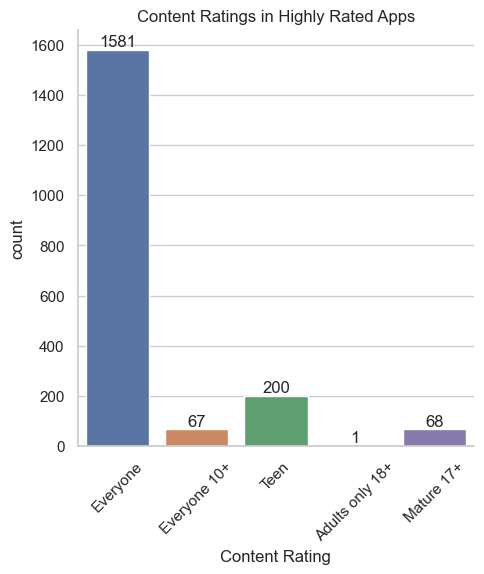

In [601]:
g= sns.catplot(data=high_rated_apps, x='Content Rating', hue='Content Rating', kind="count", palette='deep', legend=False)

# Add count labels to bars
ax = g.ax
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xticks(rotation=45)
plt.title('Content Ratings in Highly Rated Apps')
#plt.tight_layout()
plt.show()

7. What is the average price of apps per category?

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\561365101.py:1: FutureWarning: The provided callable <function mean at 0x00000262ADFFF4C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  paid_apps_per_category_avg_mean = paid_apps.groupby('Category')['Price'].agg(np.mean)


The average price of paid apps per category is: 
Category
FINANCE                187.682308
LIFESTYLE              108.937778
FAMILY                  14.177407
MEDICAL                 11.853864
BUSINESS                 6.762727
DATING                   5.740000
MAPS_AND_NAVIGATION      5.390000
PHOTOGRAPHY              4.902222
PARENTING                4.790000
TRAVEL_AND_LOCAL         4.686250
Name: Price, dtype: float64


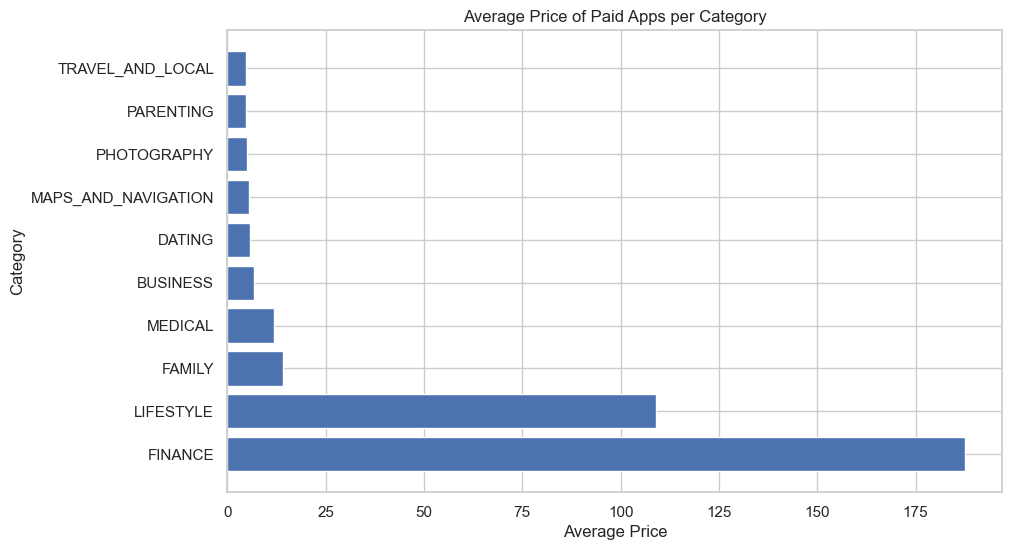

In [614]:

paid_apps_per_category_avg_mean = paid_apps.groupby('Category')['Price'].agg(np.mean)

paid_apps_per_category_avg_mean_sorted = paid_apps_per_category_avg_mean.sort_values(ascending=False).head(10)
print(f"The average price of paid apps per category is: \n{paid_apps_per_category_avg_mean_sorted}")

plt.figure(figsize=(10,6))
plt.barh(paid_apps_per_category_avg_mean_sorted.index,paid_apps_per_category_avg_mean_sorted.values)
plt.xlabel('Average Price')
plt.ylabel('Category')
plt.title('Average Price of Paid Apps per Category')
plt.show()

8. Is there a relationship between price and installs?

In [615]:
corr = df['Price'].corr(df['Installs'])
corr

np.float64(-0.011890220320260266)

<Axes: xlabel='Price', ylabel='Installs'>

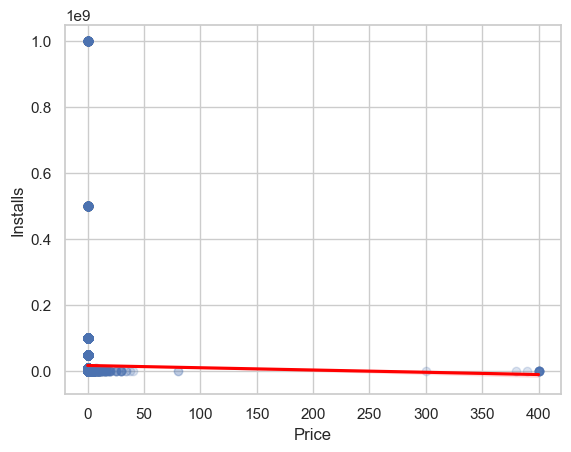

In [616]:
sns.regplot(data=df, x='Price', y='Installs', scatter_kws={'alpha':0.2}, line_kws={"color":"red"})

**Interpretation**

Most apps are clustered under $10 and under 10,000 installs

A few high-priced apps are extreme outliers

Overall trend: higher price → fewer installs

Let's visualize how app updates have changed over the years.

In [617]:
new_df=df
new_df['Update Year'] = new_df['Last Updated'].dt.year

C:\Users\nithyaa\AppData\Local\Temp\ipykernel_11188\1403562296.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=updates_per_year.index, y=updates_per_year.values, palette='deep')


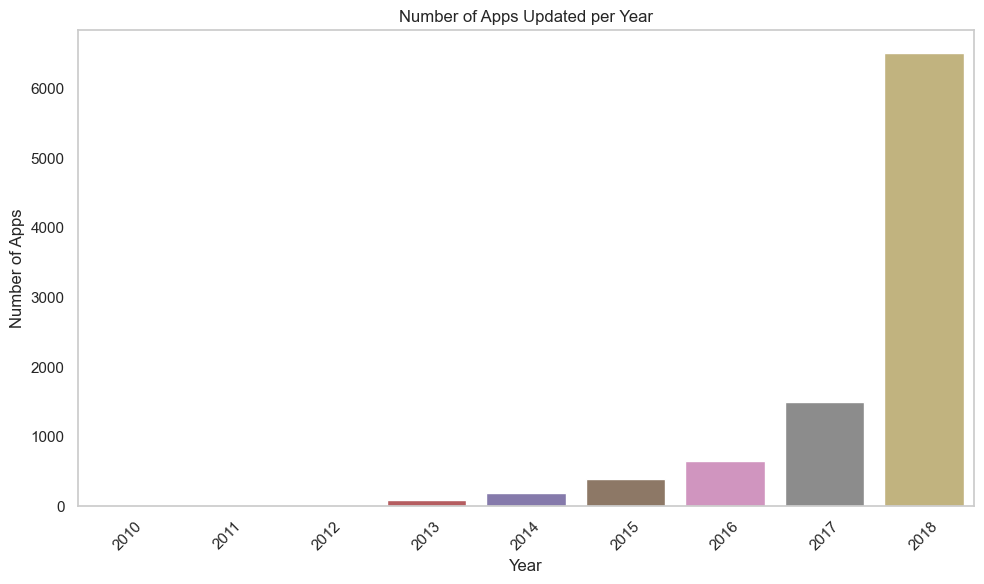

In [618]:
# Count number of apps updated per year
updates_per_year = new_df['Update Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=updates_per_year.index, y=updates_per_year.values, palette='deep')

plt.title('Number of Apps Updated per Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Let's  visualize app updates over time, broken down by categories like:

✅ App category (e.g. GAME, TOOLS, EDUCATION)

✅ App type (Free vs Paid)


In [619]:
# Limit to Top 5 most common categories
top_categories = new_df['Category'].value_counts().head(5).index
new_df_top = new_df[new_df['Category'].isin(top_categories)]


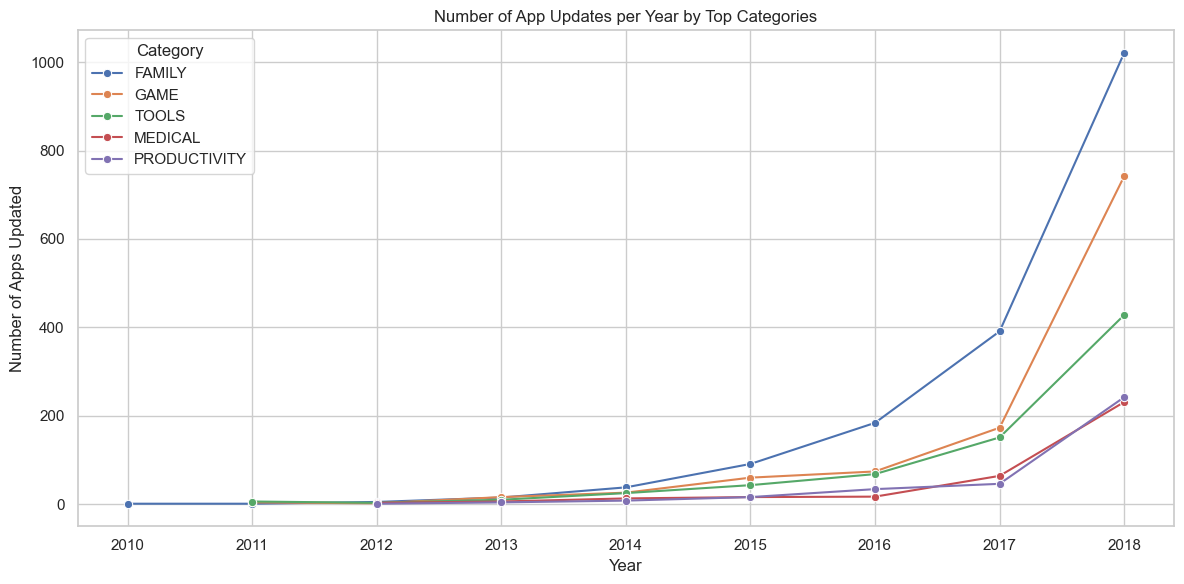

In [620]:
# Group by Year and Category
grouped = new_df_top.groupby(['Update Year', 'Category']).size().reset_index(name='App Count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Update Year', y='App Count', hue='Category', marker='o')
plt.title('Number of App Updates per Year by Top Categories')
plt.ylabel('Number of Apps Updated')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

Family and Game apps have sharp increase in updates from year 2017 to 2018. In contrast, Productivity apps have consistent growth.

9. Do recently updated apps tend to have better ratings?

In [621]:
rate_corr = df['Last Updated'].corr(df['Rating'])
rate_corr

np.float64(0.1427911806466333)

There is a slight positive relationship between rating and the recent updates, but it is not strong enough to be considered significant on its own.

In [623]:
# Extract update year
df['Update Year'] = df['Last Updated'].dt.year

# Group by year and compute average rating
rating_by_year = df.groupby('Update Year')['Rating'].mean().reset_index()


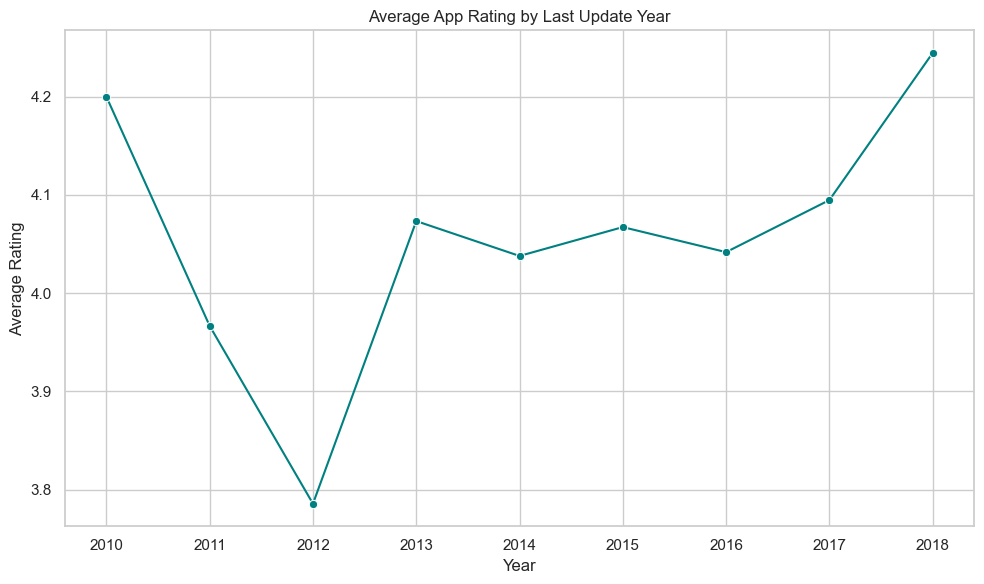

In [624]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_by_year, x='Update Year', y='Rating', marker='o', color='teal')
plt.title('Average App Rating by Last Update Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Rating')

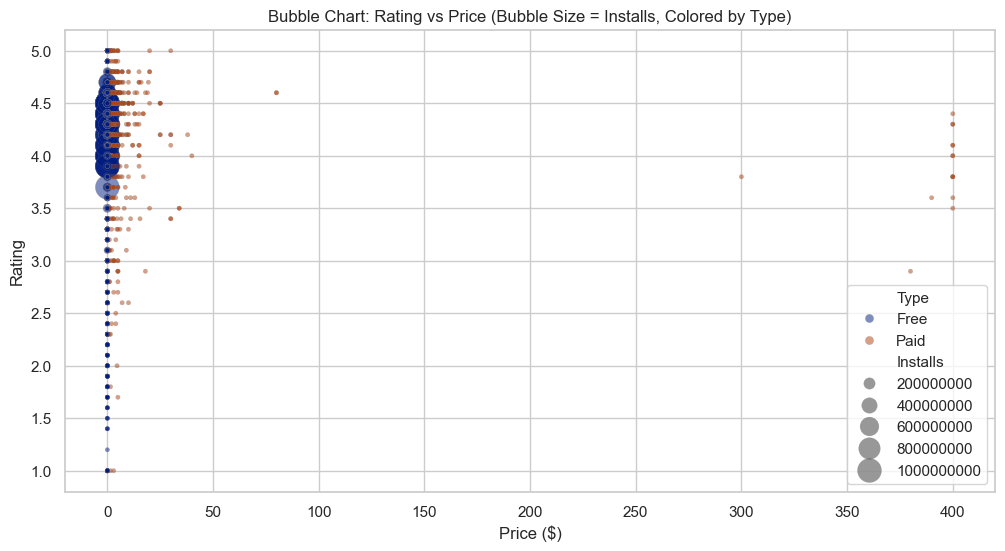

In [ ]:
# Seaborn "bubble chart" to show relationship between Price, Rating, and Installs
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Price',
    y='Rating',
    size='Installs',
    hue='Type',  # Optional: color bubbles by app type (Free/Paid)
    sizes=(10, 300),  # Min and max bubble sizes
    alpha=0.5,
    edgecolor='gray',palette='dark'
)

plt.title('Bubble Chart: Rating vs Price (Bubble Size = Installs, Colored by Type)')
plt.xlabel('Price ($)')
plt.ylabel('Rating')